In [2]:
import numpy as np
from scipy import interpolate
x = np.arange(-5.01, 5.01, 0.25)
y = np.arange(-5.01, 5.01, 0.25)
xx, yy = np.meshgrid(x, y)
z = np.sin(xx**2+yy**2)
f = interpolate.interp2d(x, y, z, kind='cubic')

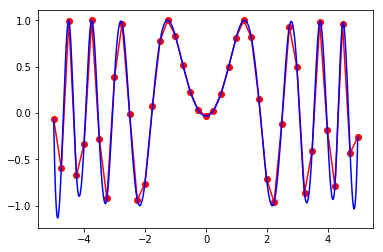

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

xnew = np.arange(-5.01, 5.01, 1e-2)
ynew = np.arange(-5.01, 5.01, 1e-2)
znew = f(xnew, ynew)
plt.plot(x, z[0, :], 'ro-', xnew, znew[0, :], 'b-')
plt.show()

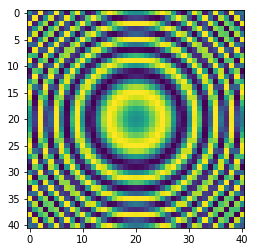

In [6]:
plt.imshow(z)

In [8]:
import scipy

x = np.array([23, 24, 24, 25, 25])
y = np.array([13, 12, 13, 12, 13])
tck, u = scipy.interpolate.splprep([x,y], s=0)
unew = np.arange(0, 1.00, 0.005)
out = scipy.interpolate.splev(unew, tck) 

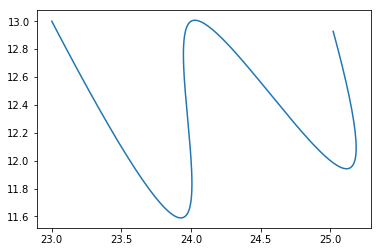

In [11]:
plt.plot(out[0], out[1])

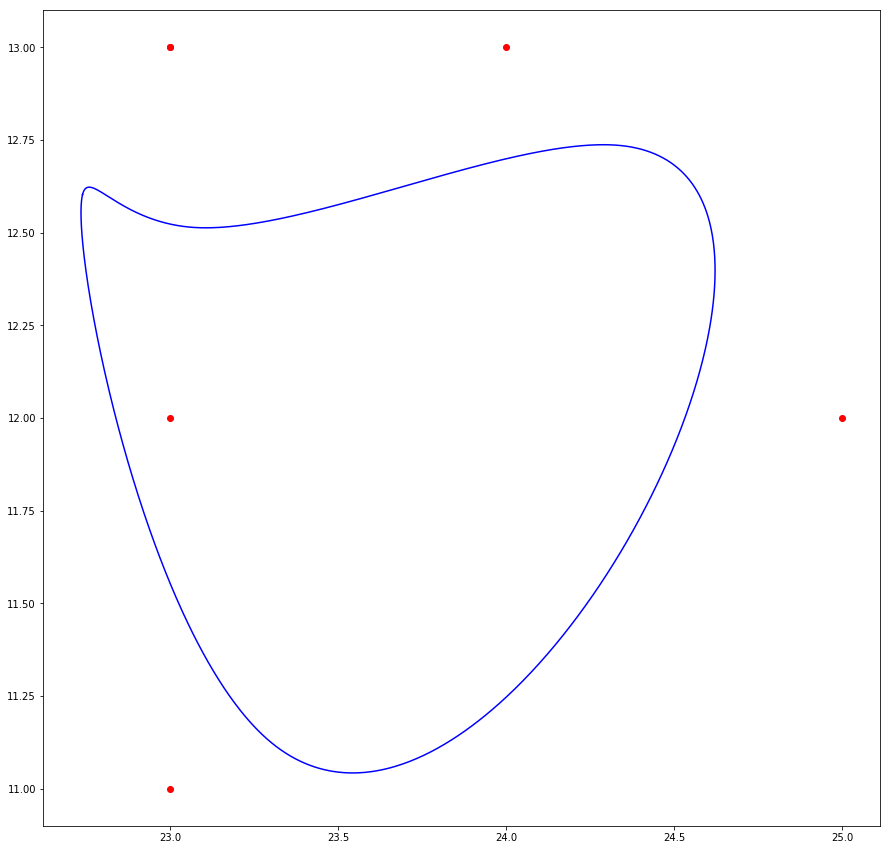

In [143]:
import numpy as np
from scipy import interpolate
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 15,15

x = np.array([23, 23, 24, 25, 23])
y = np.array([13, 12, 13, 12, 11])

# append the starting x,y coordinates
x = np.r_[x, x[0]]
y = np.r_[y, y[0]]

# fit splines to x=f(u) and y=g(u), treating both as periodic. also note that s=0
# is needed in order to force the spline fit to pass through all the input points.
tck, u = interpolate.splprep([x, y], s=1, per=True)

# evaluate the spline fits for 1000 evenly spaced distance values
xi, yi = interpolate.splev(np.linspace(0, 1, 1000), tck)

# plot the result
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'or')
ax.plot(xi, yi, '-b')

In [35]:
def ellipsoid(sx=128, sy=128, loc=(64,64),a=10,coeff=2, ax1=np.array([3,2])):
    q = np.zeros((sx,sy))
    ax1n = ax1/np.sqrt(np.dot(ax1,ax1))

    ax2n = np.array([ax1n[1],-ax1n[0]])
    b=coeff*a

    for i in range(sx):
        for j in range(sy):
            vec = np.array(loc) - np.array([i,j])
            pr1 = np.dot(vec,ax1n)
            pr2 = np.dot(vec,ax2n)

            if (0.95<=((pr1/a)**2 + (pr2/b)**2) <= 1):
                q[i,j] = 1
                
    return q.astype(np.int32)

In [36]:
ell1 = ellipsoid()

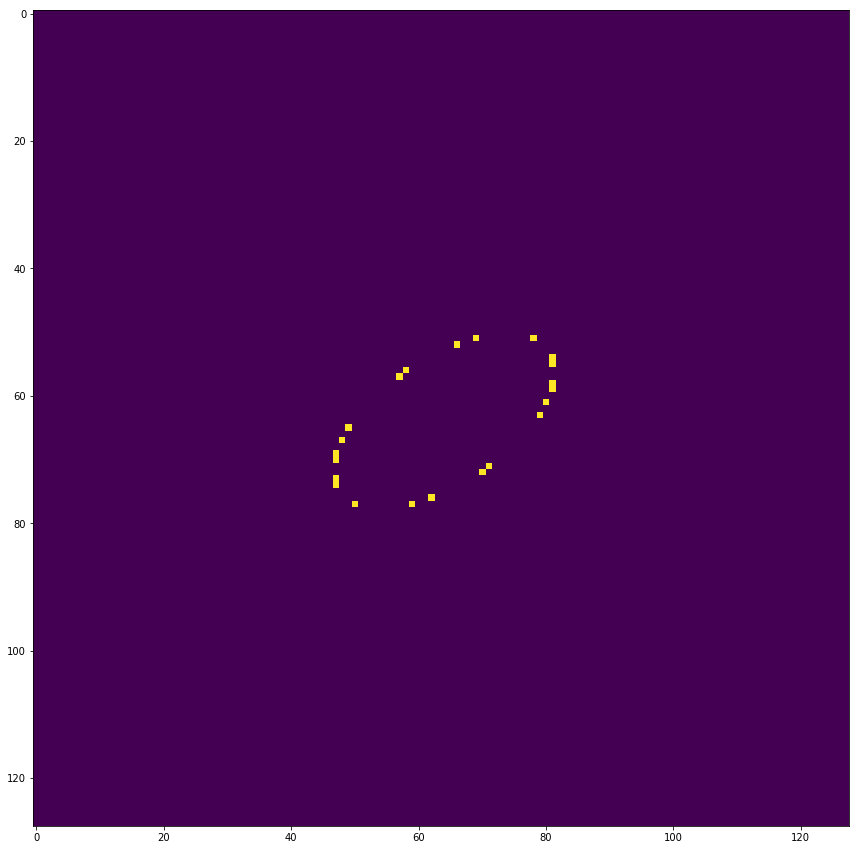

In [37]:
plt.imshow(ell1)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/interpolate/_fitpack_impl.py:226: RuntimeWarning: Setting x[0][22]=x[0][0]
  (i, m, i)))
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/interpolate/_fitpack_impl.py:226: RuntimeWarning: Setting x[1][22]=x[1][0]
  (i, m, i)))


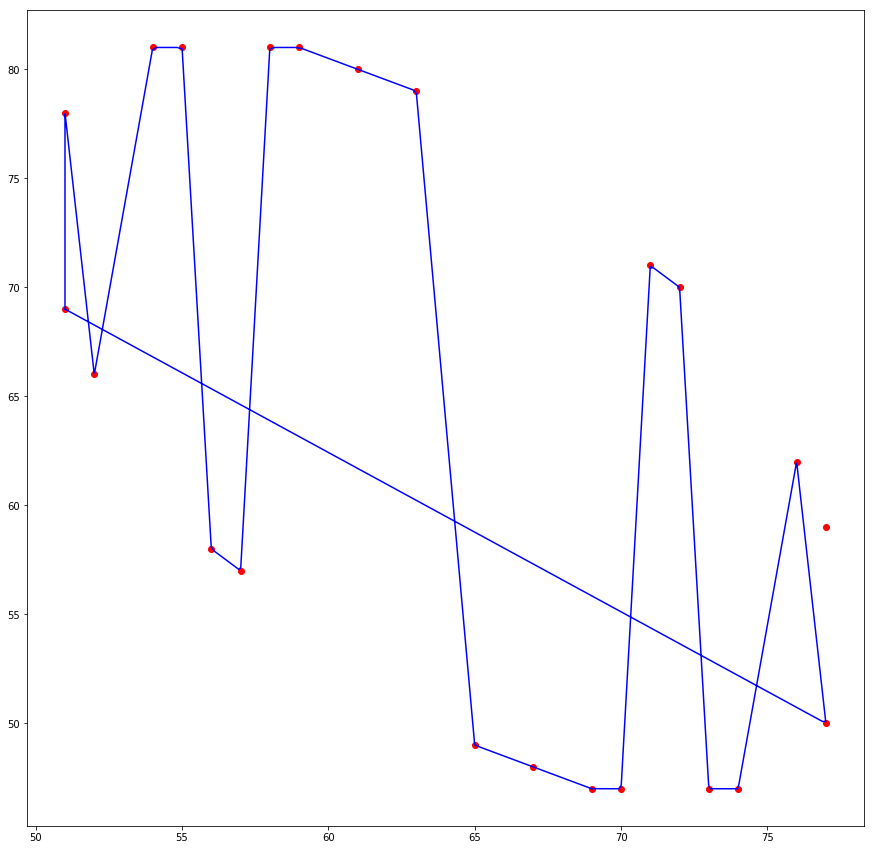

In [157]:
x,y = np.where(ell1>0)


okay = np.where(np.abs(np.diff(x)) + np.abs(np.diff(y)) > 0)
xp = np.r_[x[okay], x[-1], x[0]]
yp = np.r_[y[okay], y[-1], y[0]]

# append the starting x,y coordinates
# x = np.r_[x, x[0]]
# y = np.r_[y, y[0]]

# fit splines to x=f(u) and y=g(u), treating both as periodic. also note that s=0
# is needed in order to force the spline fit to pass through all the input points.
tck, u = interpolate.splprep([x, y], s=0, per=True, k=1)

# evaluate the spline fits for 1000 evenly spaced distance values
xi, yi = interpolate.splev(np.linspace(0, 1, 1000), tck)

# plot the result
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'or')
ax.plot(xi, yi, '-b')

In [158]:
x

array([51, 51, 52, 54, 55, 56, 57, 58, 59, 61, 63, 65, 67, 69, 70, 71, 72,
       73, 74, 76, 77, 77])

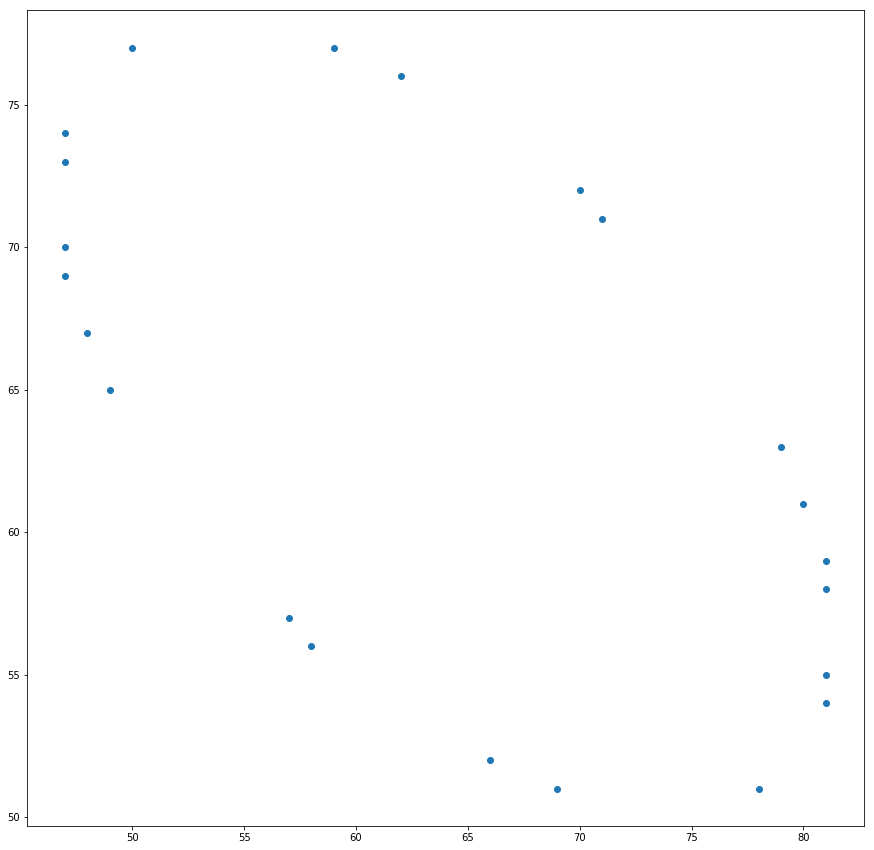

In [159]:
plt.scatter(y,x)

In [160]:
x

array([51, 51, 52, 54, 55, 56, 57, 58, 59, 61, 63, 65, 67, 69, 70, 71, 72,
       73, 74, 76, 77, 77])

In [161]:
y

array([69, 78, 66, 81, 81, 58, 57, 81, 81, 80, 79, 49, 48, 47, 47, 71, 70,
       47, 47, 62, 50, 59])

In [162]:
t = x/y

In [170]:
t.shape

(22,)

In [179]:
phi = np.arctan2(x-64,y-64)

In [180]:
#### phi

In [181]:
arr = np.array([x,y,phi])

In [182]:
arrr = np.reshape(arr.T,[22,3])

In [183]:
arr_new = np.array(sorted(arrr, key=lambda l: l[2]))

In [184]:
arr_new

array([[ 5.70000000e+01,  5.70000000e+01, -2.35619449e+00],
       [ 5.60000000e+01,  5.80000000e+01, -2.21429744e+00],
       [ 5.20000000e+01,  6.60000000e+01, -1.40564765e+00],
       [ 5.10000000e+01,  6.90000000e+01, -1.20362249e+00],
       [ 5.10000000e+01,  7.80000000e+01, -7.48378048e-01],
       [ 5.40000000e+01,  8.10000000e+01, -5.31724067e-01],
       [ 5.50000000e+01,  8.10000000e+01, -4.86899232e-01],
       [ 5.80000000e+01,  8.10000000e+01, -3.39292614e-01],
       [ 5.90000000e+01,  8.10000000e+01, -2.86051442e-01],
       [ 6.10000000e+01,  8.00000000e+01, -1.85347950e-01],
       [ 6.30000000e+01,  7.90000000e+01, -6.65681638e-02],
       [ 7.10000000e+01,  7.10000000e+01,  7.85398163e-01],
       [ 7.20000000e+01,  7.00000000e+01,  9.27295218e-01],
       [ 7.60000000e+01,  6.20000000e+01,  1.73594500e+00],
       [ 7.70000000e+01,  5.90000000e+01,  1.93797016e+00],
       [ 7.70000000e+01,  5.00000000e+01,  2.39321461e+00],
       [ 7.40000000e+01,  4.70000000e+01

In [245]:
ra =2*np.random.rand(22)-1

In [246]:
ra

array([ 0.34589239,  0.08055155, -0.93462474, -0.35985538, -0.80594602,
       -0.72678319,  0.54180604, -0.87067599,  0.45136733,  0.65261604,
       -0.18306556,  0.77901682,  0.43926463,  0.7515305 ,  0.58360606,
       -0.79401065,  0.0385538 , -0.20950436, -0.40334526,  0.30563944,
       -0.45713097,  0.45745337])

In [247]:
xx = arr_new[:,0] + ra

In [248]:
yy = arr_new[:,1] + ra

In [249]:
type(yy[0])

numpy.float64

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/interpolate/_fitpack_impl.py:296: RuntimeWarning: The spline has a residual sum of squares fp such that abs(fp-s)/s<=0.001	k=3 n=21 m=23 fp=1.000355 s=1.000000
  (k, len(t), m, fp, s)))


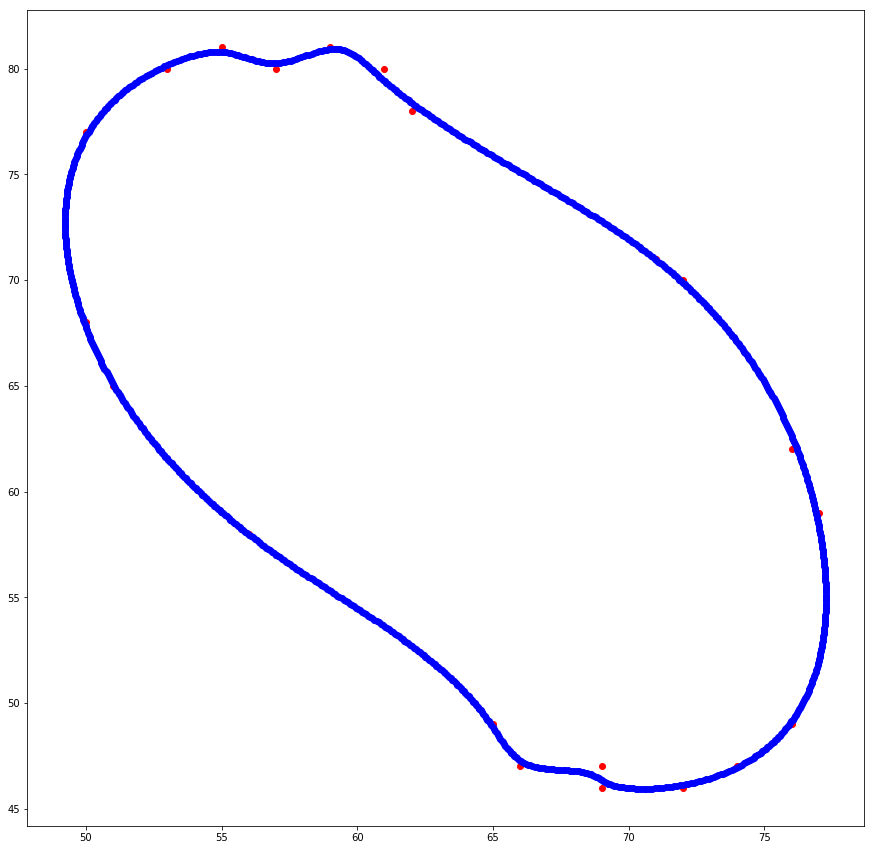

In [250]:
x = xx.astype(np.int32)
y = yy.astype(np.int32)
# append the starting x,y coordinates

okay = np.where(np.abs(np.diff(x)) + np.abs(np.diff(y)) > 0)
xp = np.r_[x[okay],  x[-1], x[0]]
yp = np.r_[y[okay],  y[-1], y[0]]

# fit splines to x=f(u) and y=g(u), treating both as periodic. also note that s=0
# is needed in order to force the spline fit to pass through all the input points.
tck, u = interpolate.splprep([xp, yp], s=1, per=True, k=3,quiet=0)

# evaluate the spline fits for 1000 evenly spaced distance values
xi, yi = interpolate.splev(np.linspace(0, 1, 1000), tck)

# plot the result
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'or')
ax.plot(xi, yi, 'ob')

In [243]:
xx

array([56.01797496, 55.81300871, 52.32704796, 50.62582006, 51.40206205,
       53.74507755, 55.79232931, 57.59610964, 58.72251142, 60.15739044,
       62.05739911, 70.39119338, 72.97457072, 75.88727563, 77.45605271,
       77.71099584, 73.90010037, 73.63523273, 70.47236832, 69.24478096,
       66.72507505, 64.59662965])

In [244]:
yy

array([56.01797496, 57.81300871, 66.32704796, 68.62582006, 78.40206205,
       80.74507755, 81.79232931, 80.59610964, 80.72251142, 79.15739044,
       78.05739911, 70.39119338, 70.97457072, 61.88727563, 59.45605271,
       50.71099584, 46.90010037, 47.63523273, 47.47236832, 47.24478096,
       47.72507505, 48.59662965])

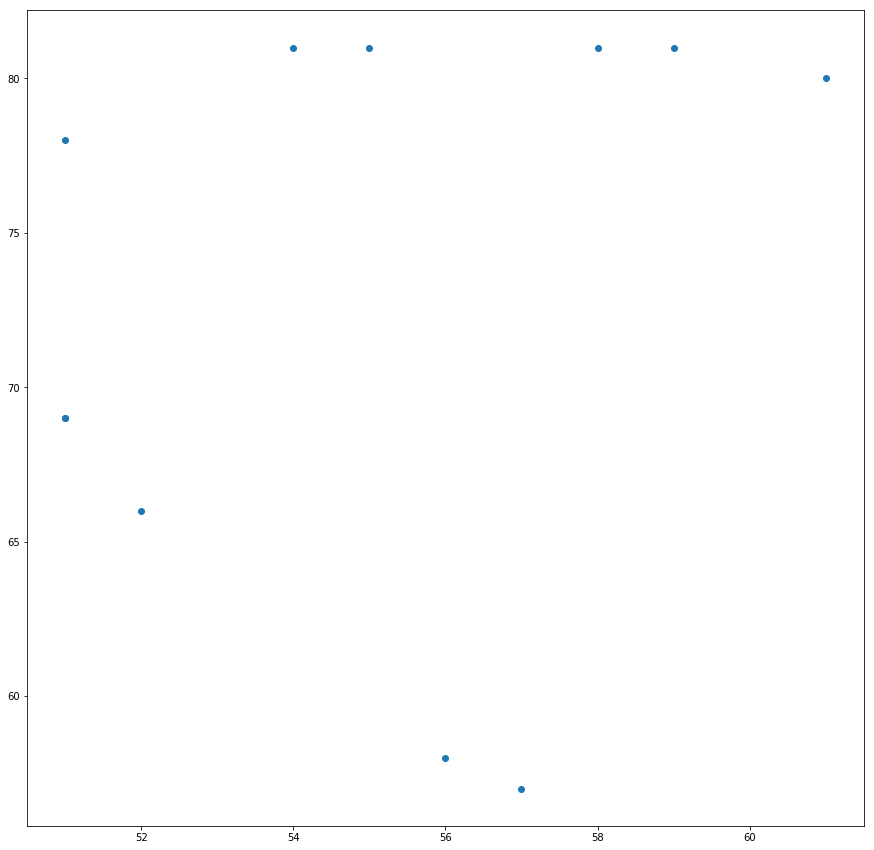

In [144]:
plt.scatter(xx,yy)

In [252]:
q = np.zeros((128,128))

In [253]:
q[np.round(xi).astype(np.int32), np.round(yi).astype(np.int32)] = 1

In [254]:
xi.astype(np.int32)

array([57, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 55, 55,
       55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 53, 53, 53, 53, 53, 53,
       53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 52, 52, 52, 52, 52, 52,
       52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 51, 51, 51, 51,
       51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51,
       51, 51, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
       50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 49, 49, 49, 49,
       49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,
       49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,
       49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,
       49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,
       49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,
       49, 49, 49, 50, 50

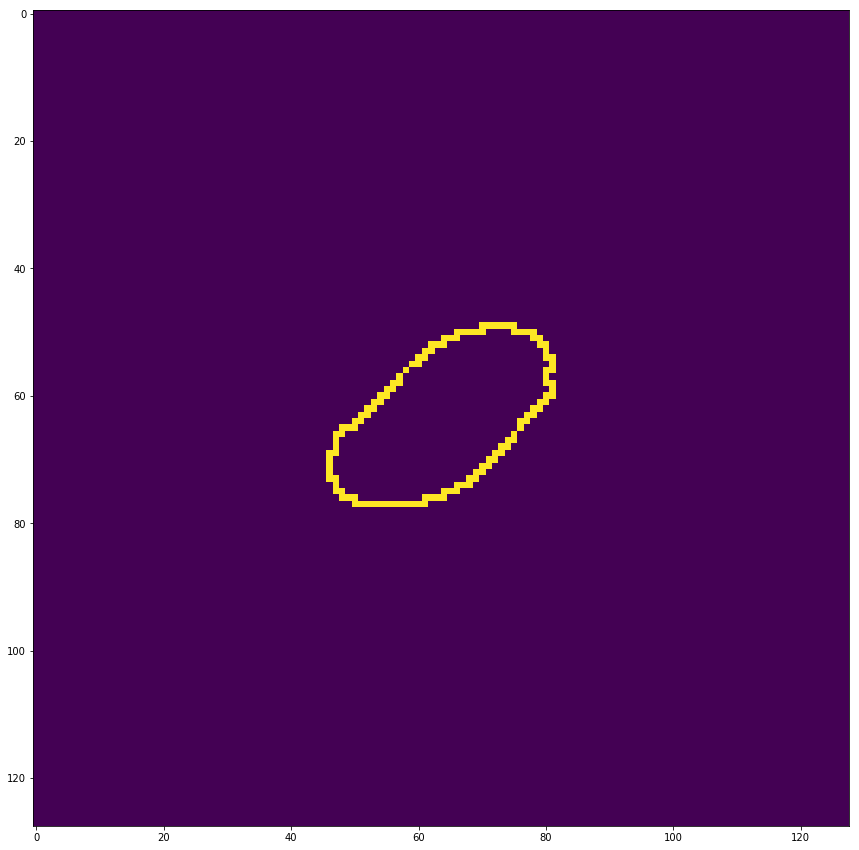

In [255]:
plt.imshow(q)